In [1]:
import numpy as np
import pandas as pd
import random
import math

In [2]:
## function for calculate fitness
def fitnessFunction(x, y):
    f = round(math.cos((x - 1.14) ** 3) - 100000 * (y ** 2 - x) ** 2, 3)
    return f

In [3]:
## function for generate fitness array
def fitness(location):
    fit = []
    for i in range(len(location)):
        # constraint hadling for x + y >= 1, using Dynamic Penalty
        if location[i][0] + location[i][1] < 1:
            f = fitnessFunction(location[i][0], location[i][1])	
            temp = f - ((0.5 * f) ** 2) * (abs((location[i][0] + location[i][1]) - 1) ** 2)
        else:
            temp = fitnessFunction(location[i][0], location[i][1])
        fit.append(temp)
    return fit

In [4]:
## function for initialize particle position and velocity
def initializeParticle(num_of_particle, x_range, y_range):
    location = []
    count = 0
    while count < num_of_particle:
        x = round(random.uniform(x_range[0], x_range[1]), 3)
        y = round(random.uniform(y_range[0], y_range[1]), 3)
        if x + y >= 1:
            temp = [x, y]
            location.append(temp)
            count += 1

    velocity = []
    for i in range(num_of_particle):
        x = round(random.uniform(-1, 1), 3)
        y = round(random.uniform(-1, 1), 3)
        temp = [x, y]
        velocity.append(temp)

    return location, velocity

In [5]:
## function for initialize pBest array with negative value
def initializePbest(num_of_particle):
    pBest = []
    pBestLoc = []
    for i in range(num_of_particle):
        pBest.append(-float('Inf'))
        pBestLoc.append([-float('Inf'), -float('Inf')])

    return pBest, pBestLoc

In [6]:
## function for find pBest, pBestLoc, gBest, and gBestLoc
def best(fit, pBest, pBestLoc, particle):
    pBestTemp = []
    pBestLocTemp = []
    for i in range(len(fit)):
        if fit[i] >= pBest[i]:
            pBestTemp.append(fit[i])
            pBestLocTemp.append([particle[i][0], particle[i][1]])
        else:
            pBestTemp.append(pBest[i])
            pBestLocTemp.append([pBestLoc[i][0], pBestLoc[i][1]])
    gBest = max(pBestTemp)
    gBestLoc = pBestTemp.index(max(pBestTemp))

    return pBestTemp, pBestLocTemp, gBest, gBestLoc

In [25]:
## parameters
c1 = 1 # acceleration constant 1
c2 = 2 # acceleration constant 2
iteration = 100
num_of_particle = 25
p_crazy = 0.6 # craziness probability

x_range = [0, 2]
y_range = [0, 3]
vxmax = 0.1 * x_range[1] # velocity x maximum
vymax = 0.1 * y_range[1] # velocity y maximum

In [26]:
## initial particle and velocity
particle, velocity = initializeParticle(num_of_particle, x_range, y_range)

In [27]:
pBest, pBestLoc = initializePbest(num_of_particle)

In [28]:
result = []
for n in range(iteration):
    ## inertia weight
    w = 1 - ((n / iteration) * (1 - 0))

    fit = fitness(particle)

    ## replace previous pBest and pBestLoc if new fit value is better than previous pBest
    pBest, pBestLoc, gBest, gBestLoc = best(fit, pBest, pBestLoc, particle)
    result.append(gBest)

    print("iter: %2d  X: %.3f Y: %.3f => %.3f" % (n, pBestLoc[gBestLoc][0], pBestLoc[gBestLoc][1], gBest))

    for i in range(num_of_particle):
        if i == gBestLoc:
            velocity[i] = velocity[i]
        else:
            ## craziness
            if random.uniform(0, 1) <= p_crazy:
                velocity[i][0] = random.random() * vxmax
                velocity[i][1] = random.random() * vymax
            else:
                velocity[i][0] = round((w * (velocity[i][0])) + (random.random() * c1 * (pBestLoc[i][0] - particle[i][0])) + (random.random() * c2 * (particle[gBestLoc][0] - particle[i][0])), 3)
                velocity[i][1] = round((w * (velocity[i][1])) + (random.random() * c1 * (pBestLoc[i][1] - particle[i][1])) + (random.random() * c2 * (particle[gBestLoc][1] - particle[i][1])), 3)

        ## velocity damping
        if abs(velocity[i][0]) > vxmax:
            velocity[i][0] = (velocity[i][0] / abs(velocity[i][0])) * vxmax
        if abs(velocity[i][1]) > vymax:
            velocity[i][1] = (velocity[i][1] / abs(velocity[i][1])) * vymax

        particle[i][0] += velocity[i][0]
        particle[i][1] += velocity[i][1]

        ## constraint handling for 0 <= x <= 2 and 0 <= y <= 3 using Adhere strategy
        if abs(particle[i][0]) > x_range[1]:
            particle[i][0] = (particle[i][0] / abs(particle[i][0])) * x_range[1]
        if abs(particle[i][1]) > y_range[1]:
            particle[i][1] = (particle[i][1] / abs(particle[i][1])) * y_range[1]

iter:  0  X: 1.081 Y: 1.023 => -117.825
iter:  1  X: 1.123 Y: 1.062 => -1.346
iter:  2  X: 1.123 Y: 1.062 => -1.346
iter:  3  X: 1.123 Y: 1.062 => -1.346
iter:  4  X: 1.123 Y: 1.062 => -1.346
iter:  5  X: 1.123 Y: 1.062 => -1.346
iter:  6  X: 1.123 Y: 1.062 => -1.346
iter:  7  X: 1.123 Y: 1.062 => -1.346
iter:  8  X: 1.123 Y: 1.062 => -1.346
iter:  9  X: 1.123 Y: 1.062 => -1.346
iter: 10  X: 2.000 Y: 1.415 => 0.527
iter: 11  X: 2.000 Y: 1.415 => 0.527
iter: 12  X: 2.000 Y: 1.415 => 0.527
iter: 13  X: 2.000 Y: 1.415 => 0.527
iter: 14  X: 2.000 Y: 1.415 => 0.527
iter: 15  X: 2.000 Y: 1.415 => 0.527
iter: 16  X: 2.000 Y: 1.415 => 0.527
iter: 17  X: 2.000 Y: 1.415 => 0.527
iter: 18  X: 2.000 Y: 1.415 => 0.527
iter: 19  X: 2.000 Y: 1.415 => 0.527
iter: 20  X: 2.000 Y: 1.415 => 0.527
iter: 21  X: 2.000 Y: 1.415 => 0.527
iter: 22  X: 2.000 Y: 1.415 => 0.527
iter: 23  X: 2.000 Y: 1.415 => 0.527
iter: 24  X: 2.000 Y: 1.415 => 0.527
iter: 25  X: 2.000 Y: 1.415 => 0.527
iter: 26  X: 2.000 Y: 1.41

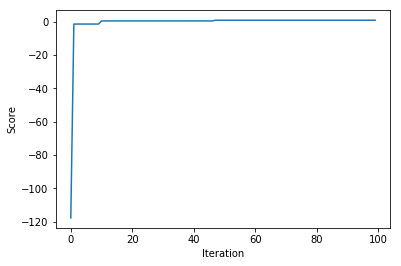

In [29]:
## plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(result)
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.show()